# Logistic regression

## Synthetic news dataset

In [1]:
import pandas as pd
import numpy as np
import datetime

start_date_string = '2010-01-01'
end_date_string = '2010-10-01'

start_date = datetime.datetime.fromisoformat(start_date_string).date()
end_date = datetime.datetime.fromisoformat(end_date_string).date()

date_datelist = pd.date_range(start=start_date, end=end_date).tolist() 
string_datelist = [date.strftime("%m/%d/%Y") for date in date_datelist]

nyt_df = pd.DataFrame(columns = ['Date', 'Stock', 'Title', 'Abstract', 'Link'])
stock = 'Microsoft'
i = 0

title = 'Microsoft shares increase amid sanctions.'
abstract = None
link = None
#populate dataframe with a new row
nyt_df.loc[i] = [date_datelist[i], stock, title, abstract, link]
i+=1

title = 'Tech stocks on the rise, Apple, Microsoft, Tesla.'
abstract = None
link = None
#populate dataframe with a new row
nyt_df.loc[i] = [date_datelist[i], stock, title, abstract, link]
i+=1

title = 'Microsoft acquires Github on a 50bn USD deal.'
abstract = None
link = None
#populate dataframe with a new row
nyt_df.loc[i] = [date_datelist[i], stock, title, abstract, link]
i+=1

title = 'On the rise of big tech, Microsoft and Amazon Web Services compete in cloud wars.'
abstract = None
link = None
#populate dataframe with a new row
nyt_df.loc[i] = [date_datelist[i], stock, title, abstract, link]
i+=1

title = 'Microsoft share plunges after earnings report.'
abstract = None
link = None
#populate dataframe with a new row
nyt_df.loc[i] = [date_datelist[i], stock, title, abstract, link]
i+=1

title = 'Dividends for Microsoft shareholders.'
abstract = None
link = None
#populate dataframe with a new row
nyt_df.loc[i] = [date_datelist[i], stock, title, abstract, link]
i+=1

title = 'Metaverse is interesting for Microsoft its CEO says.'
abstract = None
link = None
#populate dataframe with a new row
nyt_df.loc[i] = [date_datelist[i], stock, title, abstract, link]
i+=1

title = 'Russian hackers hit Microsoft servers.'
abstract = None
link = None
#populate dataframe with a new row
nyt_df.loc[i] = [date_datelist[i], stock, title, abstract, link]
i+=1

title = 'Bill Gates, former Chairman at Microsoft gets a divorce.'
abstract = None
link = None
#populate dataframe with a new row
nyt_df.loc[i] = [date_datelist[i], stock, title, abstract, link]
i+=1

title = 'Microsoft vs Oracle DB system.'
abstract = None
link = None
#populate dataframe with a new row
nyt_df.loc[i] = [date_datelist[i], stock, title, abstract, link]
i+=1

In [2]:
nyt_df

,Date,Stock,Title,Abstract,Link
0,2010-01-01,Microsoft,Microsoft shares increase amid sanctions.,None,None
1,2010-01-02,Microsoft,"Tech stocks on the rise, Apple, Microsoft, Tesla.",None,None
2,2010-01-03,Microsoft,Microsoft acquires Github on a 50bn USD deal.,None,None
3,2010-01-04,Microsoft,"On the rise of big tech, Microsoft and Amazon ...",None,None
4,2010-01-05,Microsoft,Microsoft share plunges after earnings report.,None,None
5,2010-01-06,Microsoft,Dividends for Microsoft shareholders.,None,None
6,2010-01-07,Microsoft,Metaverse is interesting for Microsoft its CEO...,None,None
7,2010-01-08,Microsoft,Russian hackers hit Microsoft servers.,None,None
8,2010-01-09,Microsoft,"Bill Gates, former Chairman at Microsoft gets ...",None,None
9,2010-01-10,Microsoft,Microsoft vs Oracle DB system.,None,None


## Synthetic Finbert news sentiment sample 

In [3]:
positive = [0.90, 0.80, 0.75, 0.80, 0.15, 0.60, 0.50, 0.05, 0.10, 0.20]
negative = [0.02, 0.10, 0.05, 0.05, 0.80, 0.10, 0.20, 0.70, 0.65, 0.10]
neutral = [round(1 - (positive[i] + negative[i]), 2) for i in range(len(positive))]

nyt_df['Positive'] = positive
nyt_df['Negative'] = negative
nyt_df['Neutral'] = neutral

In [4]:
nyt_df

,Date,Stock,Title,Abstract,Link,Positive,Negative,Neutral
0,2010-01-01,Microsoft,Microsoft shares increase amid sanctions.,None,None,0.90,0.02,0.08
1,2010-01-02,Microsoft,"Tech stocks on the rise, Apple, Microsoft, Tesla.",None,None,0.80,0.10,0.10
2,2010-01-03,Microsoft,Microsoft acquires Github on a 50bn USD deal.,None,None,0.75,0.05,0.20
3,2010-01-04,Microsoft,"On the rise of big tech, Microsoft and Amazon ...",None,None,0.80,0.05,0.15
4,2010-01-05,Microsoft,Microsoft share plunges after earnings report.,None,None,0.15,0.80,0.05
5,2010-01-06,Microsoft,Dividends for Microsoft shareholders.,None,None,0.60,0.10,0.30
6,2010-01-07,Microsoft,Metaverse is interesting for Microsoft its CEO...,None,None,0.50,0.20,0.30
7,2010-01-08,Microsoft,Russian hackers hit Microsoft servers.,None,None,0.05,0.70,0.25
8,2010-01-09,Microsoft,"Bill Gates, former Chairman at Microsoft gets ...",None,None,0.10,0.65,0.25
9,2010-01-10,Microsoft,Microsoft vs Oracle DB system.,None,None,0.20,0.10,0.70


## Synthetic previous day close price

In [5]:
close_price_previous_day = [280, 282, 285, 286, 269, 271, 273, 269, 269, 272]
nyt_df['Price'] = close_price_previous_day

In [6]:
nyt_df

,Date,Stock,Title,Abstract,Link,Positive,Negative,Neutral,Price
0,2010-01-01,Microsoft,Microsoft shares increase amid sanctions.,None,None,0.90,0.02,0.08,280
1,2010-01-02,Microsoft,"Tech stocks on the rise, Apple, Microsoft, Tesla.",None,None,0.80,0.10,0.10,282
2,2010-01-03,Microsoft,Microsoft acquires Github on a 50bn USD deal.,None,None,0.75,0.05,0.20,285
3,2010-01-04,Microsoft,"On the rise of big tech, Microsoft and Amazon ...",None,None,0.80,0.05,0.15,286
4,2010-01-05,Microsoft,Microsoft share plunges after earnings report.,None,None,0.15,0.80,0.05,269
5,2010-01-06,Microsoft,Dividends for Microsoft shareholders.,None,None,0.60,0.10,0.30,271
6,2010-01-07,Microsoft,Metaverse is interesting for Microsoft its CEO...,None,None,0.50,0.20,0.30,273
7,2010-01-08,Microsoft,Russian hackers hit Microsoft servers.,None,None,0.05,0.70,0.25,269
8,2010-01-09,Microsoft,"Bill Gates, former Chairman at Microsoft gets ...",None,None,0.10,0.65,0.25,269
9,2010-01-10,Microsoft,Microsoft vs Oracle DB system.,None,None,0.20,0.10,0.70,272


## Synthetic label (up, down from previous day)
- up: +1 (if difference between current day's close price - previous day's close price > 0)
- down: 0 (if difference <= 0)

In [7]:
label = [1, 1, 1, 1, 0, 1, 1, 0, 0, 1]
nyt_df['Label'] = label

In [8]:
nyt_df

,Date,Stock,Title,Abstract,Link,Positive,Negative,Neutral,Price,Label
0,2010-01-01,Microsoft,Microsoft shares increase amid sanctions.,None,None,0.90,0.02,0.08,280,1
1,2010-01-02,Microsoft,"Tech stocks on the rise, Apple, Microsoft, Tesla.",None,None,0.80,0.10,0.10,282,1
2,2010-01-03,Microsoft,Microsoft acquires Github on a 50bn USD deal.,None,None,0.75,0.05,0.20,285,1
3,2010-01-04,Microsoft,"On the rise of big tech, Microsoft and Amazon ...",None,None,0.80,0.05,0.15,286,1
4,2010-01-05,Microsoft,Microsoft share plunges after earnings report.,None,None,0.15,0.80,0.05,269,0
5,2010-01-06,Microsoft,Dividends for Microsoft shareholders.,None,None,0.60,0.10,0.30,271,1
6,2010-01-07,Microsoft,Metaverse is interesting for Microsoft its CEO...,None,None,0.50,0.20,0.30,273,1
7,2010-01-08,Microsoft,Russian hackers hit Microsoft servers.,None,None,0.05,0.70,0.25,269,0
8,2010-01-09,Microsoft,"Bill Gates, former Chairman at Microsoft gets ...",None,None,0.10,0.65,0.25,269,0
9,2010-01-10,Microsoft,Microsoft vs Oracle DB system.,None,None,0.20,0.10,0.70,272,1


## Logistic Regression model **without price feature**

### Split dataset to train and test

In [9]:
X = np.array(nyt_df[['Positive', 'Negative', 'Neutral']])
y = np.array(nyt_df['Label'])
X, y

(array([[0.9 , 0.02, 0.08],
        [0.8 , 0.1 , 0.1 ],
        [0.75, 0.05, 0.2 ],
        [0.8 , 0.05, 0.15],
        [0.15, 0.8 , 0.05],
        [0.6 , 0.1 , 0.3 ],
        [0.5 , 0.2 , 0.3 ],
        [0.05, 0.7 , 0.25],
        [0.1 , 0.65, 0.25],
        [0.2 , 0.1 , 0.7 ]]),
 array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, y_train, X_test, y_test

(array([[0.05, 0.7 , 0.25],
        [0.75, 0.05, 0.2 ],
        [0.2 , 0.1 , 0.7 ],
        [0.15, 0.8 , 0.05],
        [0.8 , 0.05, 0.15],
        [0.5 , 0.2 , 0.3 ]]),
 array([0, 1, 1, 0, 1, 1], dtype=int64),
 array([[0.1 , 0.65, 0.25],
        [0.8 , 0.1 , 0.1 ],
        [0.6 , 0.1 , 0.3 ],
        [0.9 , 0.02, 0.08]]),
 array([0, 1, 1, 1], dtype=int64))

In [11]:
# fit model
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [12]:
# predict model

# Returns a NumPy Array
# Predict for One Observation
logisticRegr.predict(X_test[0].reshape(1,-1))

array([1], dtype=int64)

In [13]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.75


In [14]:
!pip install matplotlib

In [15]:
from matplotlib import pyplot as plt

xs = nyt_df['Positive'].tolist()
ys = nyt_df['Neutral'].tolist()
zs = nyt_df['Negative'].tolist()    
marker = nyt_df['Label'].tolist()

marker_symbol = ['o' if (item == 0) else '^' for item in marker]
color = ['blue' if (item == 0) else 'red' for item in marker]
marker_symbol, color

(['^', '^', '^', '^', 'o', '^', '^', 'o', 'o', '^'],
 ['red', 'red', 'red', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'red'])

1
1
1
1
0
1
1
0
0
1


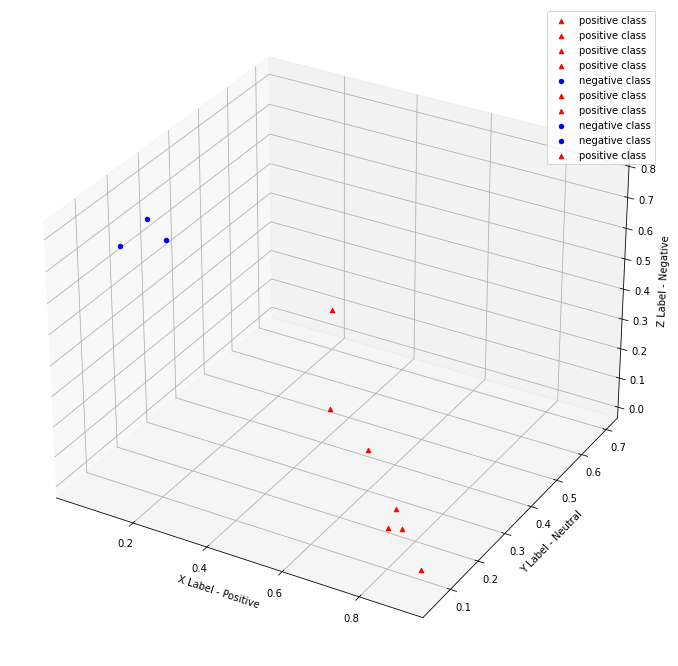

In [16]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

classes = {0: 'negative class', 1: 'positive class'}

for i in range(len(xs)):
    print(marker[i])
    cur_label = classes[marker[i]]
    ax.scatter(xs[i], ys[i], zs[i], marker=marker_symbol[i], c=color[i], label=cur_label)

ax.set_xlabel('X Label - Positive')
ax.set_ylabel('Y Label - Neutral')
ax.set_zlabel('Z Label - Negative')

ax.legend(loc=0, scatterpoints = 1)
plt.show()


# Logistic regression on dataset

In [31]:
from utilities import merge_dates
df = pd.read_csv('Financial_News/train_apple.csv', index_col=0, parse_dates=['date'])
df_new = merge_dates(df)
df_new

,date,stock,Open,Close,Volume,Positive,Negative,Neutral,Price_change
0,2020-05-27,AAPL,79.035004,79.527496,112945200,0.093772,0.389471,0.516757,1
1,2020-05-28,AAPL,79.192497,79.562500,133560800,0.275527,0.195521,0.528952,0
2,2020-05-29,AAPL,79.812500,79.485001,153532400,0.414036,0.036778,0.549186,0
3,2020-06-01,AAPL,79.437500,80.462502,80791200,0.047975,0.036928,0.915097,1
4,2020-06-02,AAPL,80.187500,80.834999,87642800,0.319598,0.050827,0.629575,1


In [27]:
X = np.array(new_df[['Positive', 'Negative', 'Neutral']])
y = np.array(new_df['Price_change'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, y_train, X_test, y_test

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

# predict model
# Predict for One Observation
logisticRegr.predict(X_test[0].reshape(1,-1))

# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.5


### On NYT Dataset

In [47]:
df = pd.read_csv('Financial_News/msft_nyt_news_with_sentiment_scores_merged_dates.csv', index_col=0, parse_dates=['date'])
df

,date,Open,Close,Volume,Price_change,stock,Positive,Negative,Neutral
0,2010-01-04,30.620001,30.950001,38409100,1,Microsoft,0.099365,0.279259,0.621377
1,2010-01-05,30.850000,30.959999,49749600,0,Microsoft,0.250803,0.126653,0.622545
2,2010-01-06,30.879999,30.770000,58182400,-1,Microsoft,0.087274,0.046277,0.866449
3,2010-01-07,30.629999,30.450001,50559700,-1,Microsoft,0.084481,0.040280,0.875239
4,2010-01-08,30.280001,30.660000,51197400,1,Microsoft,0.090337,0.019652,0.890012
...,...,...,...,...,...,...,...,...,...
1942,2018-03-29,90.180000,91.269997,45867500,1,Microsoft,0.057010,0.251779,0.691211
1943,2018-04-02,90.470001,88.519997,48515400,-1,Microsoft,0.036650,0.385371,0.577979
1944,2018-04-03,89.580002,89.709999,37213800,1,Microsoft,0.134479,0.389351,0.476169
1945,2018-04-04,87.849998,92.330002,35560000,1,Microsoft,0.038763,0.377198,0.584039


In [48]:
# reduce it to two classes
df["Price_change"].replace({-1: 0}, inplace=True)
new_df = df
new_df

,date,Open,Close,Volume,Price_change,stock,Positive,Negative,Neutral
0,2010-01-04,30.620001,30.950001,38409100,1,Microsoft,0.099365,0.279259,0.621377
1,2010-01-05,30.850000,30.959999,49749600,0,Microsoft,0.250803,0.126653,0.622545
2,2010-01-06,30.879999,30.770000,58182400,0,Microsoft,0.087274,0.046277,0.866449
3,2010-01-07,30.629999,30.450001,50559700,0,Microsoft,0.084481,0.040280,0.875239
4,2010-01-08,30.280001,30.660000,51197400,1,Microsoft,0.090337,0.019652,0.890012
...,...,...,...,...,...,...,...,...,...
1942,2018-03-29,90.180000,91.269997,45867500,1,Microsoft,0.057010,0.251779,0.691211
1943,2018-04-02,90.470001,88.519997,48515400,0,Microsoft,0.036650,0.385371,0.577979
1944,2018-04-03,89.580002,89.709999,37213800,1,Microsoft,0.134479,0.389351,0.476169
1945,2018-04-04,87.849998,92.330002,35560000,1,Microsoft,0.038763,0.377198,0.584039


# Multinomial logistic regression

In [78]:
new_df.describe()

,Open,Close,Volume,Price_change,Positive,Negative,Neutral
count,1947.000000,1947.000000,1.947000e+03,1947.000000,1947.000000,1947.000000,1947.000000
mean,42.295074,42.313333,4.326375e+07,0.410889,0.129850,0.158246,0.711904
std,17.359715,17.365621,2.413150e+07,0.492121,0.122179,0.176011,0.190132
min,23.090000,23.010000,7.425600e+06,0.000000,0.009251,0.006623,0.016653
25%,28.175000,28.195001,2.706350e+07,0.000000,0.049918,0.032391,0.611175
50%,36.880001,36.810001,3.779320e+07,0.000000,0.087274,0.079961,0.747095
75%,51.754999,51.715000,5.277160e+07,1.000000,0.165758,0.236694,0.869667
max,97.000000,96.769997,3.193179e+08,1.000000,0.948087,0.971789,0.947425


In [73]:
X = np.array(new_df[['Positive', 'Negative', 'Neutral']])
y = np.array(new_df['Price_change'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, y_train, X_test, y_test

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

# predict model
# Predict for One Observation
predictions = logisticRegr.predict(X_test)

# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.5645412130637636


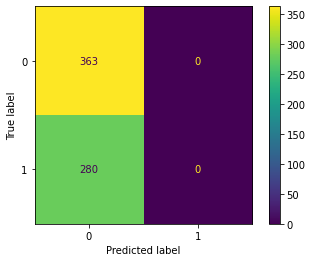

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=logisticRegr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=logisticRegr.classes_)
disp.plot()
plt.show()

## Apple 65 rows dataset test

In [80]:
df = pd.read_csv('Financial_News/train_apple.csv', index_col=0, parse_dates=['date'])
df

,date,stock,Open,Close,Volume,Positive,Negative,Neutral,Price_change
0,2020-03-09,AAPL,65.937500,66.542503,286744800,0.046127,0.411464,0.542409,-1
1,2020-03-10,AAPL,69.285004,71.334999,285290000,0.070845,0.449025,0.480130,1
2,2020-03-11,AAPL,69.347504,68.857498,255598800,0.190995,0.453761,0.355244,-1
3,2020-03-12,AAPL,63.985001,62.057499,418474000,0.204221,0.447518,0.348261,-1
4,2020-03-13,AAPL,66.222504,69.492500,370732000,0.315863,0.218127,0.466010,1
...,...,...,...,...,...,...,...,...,...
60,2020-06-04,AAPL,81.097504,80.580002,87560400,0.375941,0.027481,0.596579,-1
61,2020-06-05,AAPL,80.837502,82.875000,137250400,0.539310,0.035119,0.425571,1
62,2020-06-08,AAPL,82.562500,83.364998,95654400,0.655664,0.034216,0.310120,1
63,2020-06-09,AAPL,83.035004,85.997498,147712400,0.406257,0.030222,0.563521,1


In [81]:
df.describe()

,Open,Close,Volume,Positive,Negative,Neutral,Price_change
count,65.000000,65.000000,6.500000e+01,65.000000,65.000000,65.000000,65.000000
mean,71.105500,71.428654,1.823084e+08,0.305627,0.222379,0.471994,0.107692
std,7.510054,7.759824,8.101895e+07,0.157653,0.162100,0.167743,0.970230
min,57.020000,56.092499,8.079120e+07,0.046127,0.010436,0.059678,-1.000000
25%,63.985001,64.857498,1.298800e+08,0.201782,0.050642,0.357134,-1.000000
50%,70.599998,71.107498,1.589292e+08,0.289850,0.218127,0.460935,1.000000
75%,78.757500,78.739998,2.042168e+08,0.422797,0.340607,0.574569,1.000000
max,86.974998,88.209999,4.184740e+08,0.681881,0.584882,0.822905,1.000000


In [113]:
# reduce it to two classes
df["Price_change"].replace({-1: 0}, inplace=True)
new_df = df
new_df

X = np.array(new_df[['Positive', 'Negative', 'Neutral']])
y = np.array(new_df['Price_change'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, y_train, X_test, y_test

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

# predict model
# Predict for One Observation
predictions = logisticRegr.predict(X_test)

# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.4090909090909091


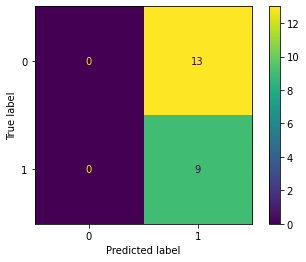

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions, labels=logisticRegr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=logisticRegr.classes_)
disp.plot()
plt.show()

In [115]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, random_state=42).fit(X, y)
predictions = clf.predict(X[:2, :])
clf.score(X, y)

0.6615384615384615

In [111]:
clf.scores_

{1: array([[0.46153846, 0.46153846, 0.46153846, 0.46153846, 0.38461538,
         0.69230769, 0.69230769, 0.69230769, 0.69230769, 0.69230769],
        [0.53846154, 0.53846154, 0.53846154, 0.53846154, 0.69230769,
         0.76923077, 0.76923077, 0.76923077, 0.76923077, 0.76923077],
        [0.53846154, 0.53846154, 0.53846154, 0.53846154, 0.69230769,
         0.61538462, 0.61538462, 0.61538462, 0.61538462, 0.61538462],
        [0.53846154, 0.53846154, 0.53846154, 0.53846154, 0.53846154,
         0.61538462, 0.61538462, 0.61538462, 0.61538462, 0.61538462],
        [0.53846154, 0.53846154, 0.53846154, 0.53846154, 0.53846154,
         0.61538462, 0.53846154, 0.53846154, 0.53846154, 0.53846154]])}

# Multinomial (3 classes) on the Apple dataset

In [144]:
new_df = pd.read_csv('Financial_News/train_apple.csv', index_col=0, parse_dates=['date'])

X = np.array(new_df[['Positive', 'Negative', 'Neutral']])
y = np.array(new_df['Price_change'])

clf = LogisticRegressionCV(cv=4, multi_class='multinomial', random_state=42).fit(X, y)
predictions = clf.predict(X[:2, :])
clf.score(X, y)

0.6

In [145]:
cm = confusion_matrix(y_test, predictions, labels=logisticRegr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=logisticRegr.classes_)
disp.plot()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [22, 2]

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


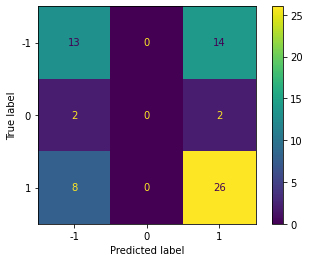

In [146]:
from sklearn.datasets import make_classification
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix


log_reg_model = LogisticRegressionCV(cv=4, multi_class='multinomial', random_state=42)

pipe=Pipeline([('logistic_regression',log_reg_model)])
pipe.fit(X, y)

LR= pipe.named_steps['logistic_regression']
y_pred = cross_val_predict(pipe, X, y, cv=4)
conf_mat = confusion_matrix(y, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                         display_labels=LR.classes_)
disp.plot()
plt.show()

In [147]:
LR.score(X, y)

0.6

In [151]:
y, y_pred

(array([-1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  0,
        -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1,
         0, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,
        -1,  1, -1,  1,  0,  0,  1,  1,  1, -1,  1,  1,  1,  1],
       dtype=int64),
 array([-1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
        -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
        -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,
         1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       dtype=int64))

In [152]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.57      0.48      0.52        27
     class 1       0.00      0.00      0.00         4
     class 2       0.62      0.76      0.68        34

    accuracy                           0.60        65
   macro avg       0.39      0.42      0.40        65
weighted avg       0.56      0.60      0.57        65



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
